## EXPLORATION_03

### 카메라 스티커 앱 만들기

#### standard
1. 자기만의 카메라앱 기능 구현을 완수하였다: 원본에 스티커 사진이 정상적으로 합성되었다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다: 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다: 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
    
#### sequence
1. 데이터 준비: 얼굴 사진, 고양이 수염 이미지
2. 얼굴 검출 & 랜드마크 검출 하기:dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾기
3. 스티커 적용 위치 확인 후 붙히기
4. 생각해볼 것: 얼굴 각도에 따라 스티커가 어떻게 변해야할까/ 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까/ 실행 속도가 중요할까/ 스티커앱을 만들 때 정확도가 얼마나 중요할까

#### trial and error

In [3]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


데이터 준비: 얼굴 사진, 고양이 수염 이미지

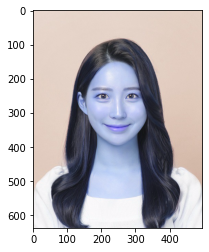

In [8]:
my_image_path = os.getenv('HOME')+'/aiffel/EXPLORATIONS/EX_03/images/me_png.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

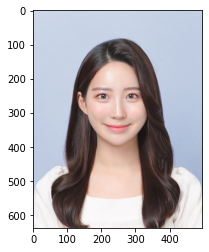

In [9]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

얼굴 검출 & 랜드마크 검출 하기

In [10]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(159, 201) (345, 387)]]


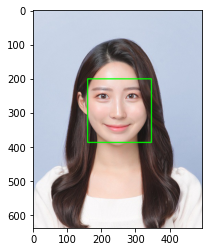

In [11]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [13]:
# 스티커를 섬세하게 적용하기 위해서는 이목구비의 위치를 아는 것이 중요
# 이목구비의 위치를 추론하는 것을 face landmark localization 기술
# face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용
# 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지
# 1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측 (여기선 이거)
# 2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

model_path = os.getenv('HOME')+'/aiffel/EXPLORATIONS/EX_03/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [14]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


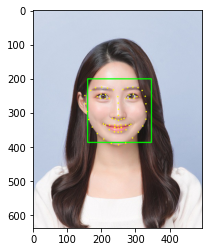

In [15]:
# points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다.
# 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 
# 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다.
# 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

스티커 적용 위치 확인

In [16]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(249, 308)
(x,y) : (249,308)
(w,h) : (187,187)


In [18]:
sticker_path = os.getenv('HOME')+'/aiffel/EXPLORATIONS/EX_03/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))  # 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다.
print (img_sticker.shape)

(187, 187, 3)


In [19]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (156,215)


In [20]:
# 스티커가 원본 이미지 밖으로 넘어가지 않아서 굳이 할 필요는 없지만 노드에 나와있어서 코드만 껴넣음 어짜피 양수라 안돌아감.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (156,215)


스티커 붙히기

In [21]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


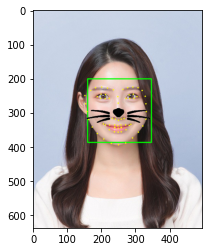

In [22]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Bounding box, Landmark 제거

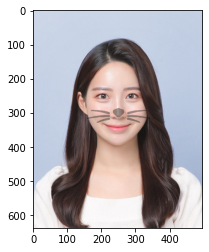

In [24]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.7, 
 np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.3, 0) #0.7/0.3 조절로 스티커의 색을 조정해 봄
    

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요? 각도에 맞춰서
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요? 애가 인식하기 힘들어짐
- 실행 속도가 중요할까요? 느리면 기다려야하니까 중요하지요
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요? 가장 중요합니다. 스티커가 정확한 곳에 위치하지 못한다는 건 카메라스티커앱이라고 불릴 자격이 없어요


#### trial and error

1. 자기만의 카메라앱 기능 구현을 완수하였다: 원본에 스티커 사진이 정상적으로 합성되었다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다: 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다: 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

사실 처음부터 그렇게 어려운 과제는 아니었다. 결국 벡터 값만 잘 구해서 스티커를 위치시키면 됐었기 때문에 처음 해봤지만 이해하기에 어려운 과제는 아니라고 생각한다. 본인은 공부하며 처음부터 자기 사진으로 스티커를 적용시켜 봤기 때문에 별 2개까지 가장 빨리 끝낸 노드가 아닌가 싶다. 하지만 이 과제의 진짜 목적은 결국 스티커 앱을 원본 이미지에 적용했을 때 문제점을 분석하는 부분이라 생각하는데 여러 이유로 이 부분은 패스하고 다음 과제에 집중하려 한다:)